<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/app/notebooks/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tel_df = pd.read_csv('/content/sample_data/Cleaned_Telecom_Dataset_New.csv', index_col = 0)
tel_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,53.85,108.15,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(tel_df.drop(['Churn'], axis = 1))
scaled_features = scaler.transform(tel_df.drop('Churn',axis = 1))

# Feature Selection

In [ ]:
X = scaled_features
y = tel_df['Churn']

#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

#WITH PYTHON PACKAGE

In [ ]:
model_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=42)

In [ ]:
y_pred= model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Mean Squared Error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.22606635071090048

#Accuracy & Other Metrics

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))

0.7739336492890996
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1549
           1       0.57      0.60      0.59       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.77      0.78      2110



# Confusion Matrix

In [ ]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
confusion_matrix_dt

array([[1295,  254],
       [ 223,  338]])

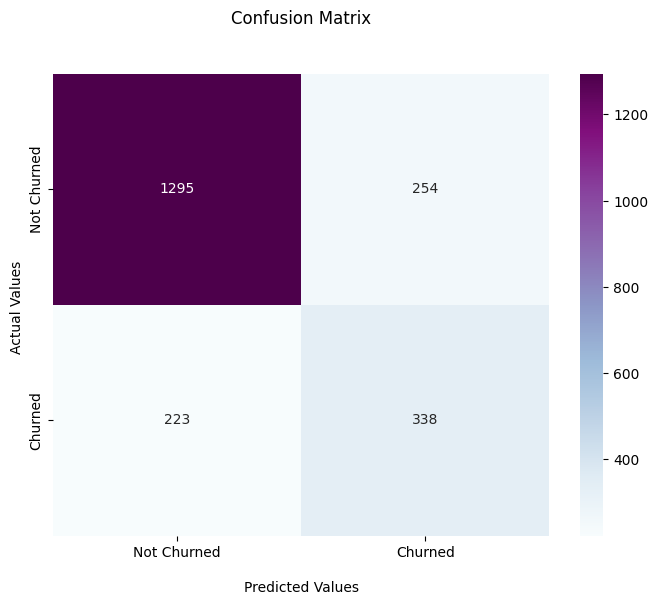

In [ ]:
cm1 = np.array(confusion_matrix_dt)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm1, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

Given our dataset is imbalanced, accuracy is not a reliable metric. This is evident from our model's accuracy of 77%, which does not provide a true reflection of performance.

Instead, we should focus on recall, precision, and the F1 score for the minority class. It's clear that the precision, recall, and F1 score for Class 1 (churned customers) are very low.

Therefore, we will use SMOTEENN (Over Sampling + ENN) to address this issue.

# SMOTEENN

In [ ]:
sm = SMOTE(random_state=42)
sm = SMOTEENN(smote = sm)
X_resampled, y_resampled = sm.fit_resample(X,y)

# Train Test Split

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)

In [ ]:
model_dt_smote = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(Xr_train, yr_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=42)

In [ ]:
yr_pred = model_dt_smote.predict(Xr_test)
yr_pred

array([0, 0, 1, ..., 0, 0, 1])

# Mean Squared Error

In [ ]:
mse = mean_squared_error(yr_test, yr_pred)
mse

0.0782789009849663

# Accuracy & Other Metrics

In [ ]:
print(accuracy_score(yr_test, yr_pred))
print(classification_report(yr_test, yr_pred))

0.9217210990150337
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       881
           1       0.92      0.93      0.93      1048

    accuracy                           0.92      1929
   macro avg       0.92      0.92      0.92      1929
weighted avg       0.92      0.92      0.92      1929



# Confusion Matrix

In [ ]:
cm2 = confusion_matrix(yr_test, yr_pred)
cm2

array([[801,  80],
       [ 71, 977]])

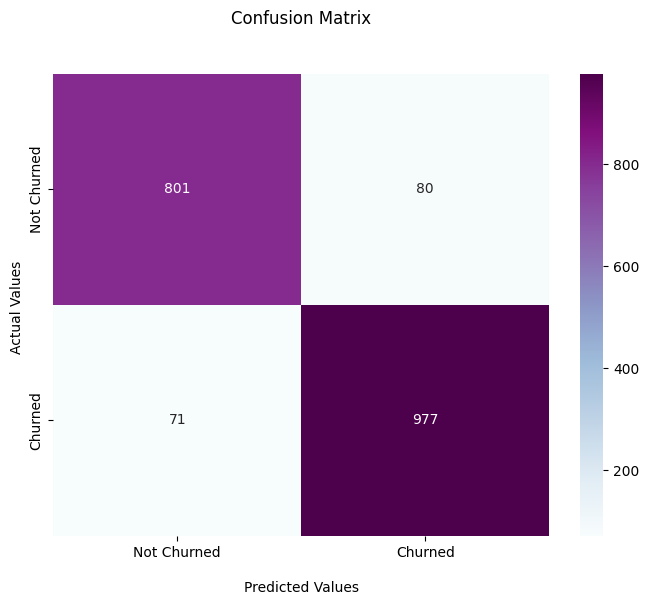

In [ ]:
cm2 = np.array(cm2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm2, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

Now we can see quite better results, i.e. Accuracy: 92% approximately, and a very good Recall, Precision & F1 score for minority class.

# WITHOUT PYTHON PACKAGE

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        best_split = None
        best_gain = 0.0

        # Calculating the entropy of the current node (whole dataset)
        current_entropy = self._entropy(y)

        # Iterating over each feature to find the best split
        for feature_idx in range(num_features):
            feature_values = np.unique(X[:, feature_idx])

            if len(feature_values) > 10:  # Assuming a feature is continuous if it has more than 10 unique values
                # Continuous feature (Reduction of Variance for Splitting point)
                sorted_idx = np.argsort(X[:, feature_idx])
                for i in range(1, len(sorted_idx)):
                    if X[sorted_idx[i], feature_idx] != X[sorted_idx[i - 1], feature_idx]:
                        split_value = (X[sorted_idx[i], feature_idx] + X[sorted_idx[i - 1], feature_idx]) / 2.0
                        X_left, y_left, X_right, y_right = self._split_continuous(X, y, feature_idx, split_value)
                        gain = self._variance_reduction(y, y_left, y_right)
                        if gain > best_gain:
                            best_gain = gain
                            best_split = {'feature_idx': feature_idx, 'split_value': split_value,
                                          'X_left': X_left, 'y_left': y_left,
                                          'X_right': X_right, 'y_right': y_right}
            else:
                # Categorical feature
                for value in feature_values:
                    X_subset, y_subset = self._split_categorical(X, y, feature_idx, value)
                    # here current_entropy represents total info gain of particular dataset, y_subset is splited labels, y[~(X[:, feature_idx] == value)] = y - y_subset
                    gain = self._information_gain(current_entropy, [y_subset, y[~(X[:, feature_idx] == value)]])
                    if gain > best_gain:
                        best_gain = gain
                        best_split = {'feature_idx': feature_idx, 'value': value,
                                      'X_subset': X_subset, 'y_subset': y_subset}

        if best_split is None:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        if 'split_value' in best_split:
            # Continuous split
            left_subtree = self._grow_tree(best_split['X_left'], best_split['y_left'], depth + 1)
            right_subtree = self._grow_tree(best_split['X_right'], best_split['y_right'], depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'],
                    'split_value': best_split['split_value'],
                    'left': left_subtree, 'right': right_subtree}
        else:
            # Categorical split
            remaining_X = X[~(X[:, best_split['feature_idx']] == best_split['value'])]
            remaining_y = y[~(X[:, best_split['feature_idx']] == best_split['value'])]
            subset_tree = self._grow_tree(best_split['X_subset'], best_split['y_subset'], depth + 1)
            remaining_tree = self._grow_tree(remaining_X, remaining_y, depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'], 'value': best_split['value'],
                    'subset': subset_tree, 'remaining': remaining_tree}

    def _entropy(self, y):
        x, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def _information_gain(self, parent_entropy, subsets):
        total = sum(len(subset) for subset in subsets)
        gain = parent_entropy - sum((len(subset) / total) * self._entropy(subset) for subset in subsets)
        return gain

    def _split_categorical(self, X, y, feature_idx, value):
        mask = X[:, feature_idx] == value
        return X[mask], y[mask]

    def _variance_reduction(self, parent, left, right):
        total_var = np.var(parent)
        left_var = np.var(left) if len(left) > 0 else 0
        right_var = np.var(right) if len(right) > 0 else 0
        total_size = len(left) + len(right)
        reduction = total_var - ((len(left) / total_size) * left_var + (len(right) / total_size) * right_var)
        return reduction

    def _split_continuous(self, X, y, feature_idx, split_value):
        mask_left = X[:, feature_idx] <= split_value
        mask_right = X[:, feature_idx] > split_value
        return X[mask_left], y[mask_left], X[mask_right], y[mask_right]

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if node['leaf']:
            return node['class']
        else:
            # print(f'Current node: {node}')
            # print(f'Current feature index: {node["feature_idx"]}')
            # print(f'Current value: {x[node["feature_idx"]]}')
            if 'split_value' in node:
                # Continuous split
                if x[node['feature_idx']] <= node['split_value']:
                    return self._predict_tree(x, node['left'])
                else:
                    return self._predict_tree(x, node['right'])
            else:
                # Categorical split
                if x[node['feature_idx']] == node['value']:
                    return self._predict_tree(x, node['subset'])
                else:
                    return self._predict_tree(x, node['remaining'])  # Follow the remaining tree

# Before Smoteenn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy & Other Metrics

In [ ]:
y_test_report = np.array(y_test)
pred_report = np.array(y_pred)

counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

for yt, yp in zip(y_test_report, pred_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate Precision, Recall, and F1 Score for both classes
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())  # Only sum true positives for both classes
total_predictions = len(y_test)  # Total predictions (both classes)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")

Accuracy: 0.7872037914691943
Precision for class 0: 0.8201396973224679
Recall for class 0: 0.9096191091026469
F1 Score for class 0: 0.8625650443832262
Precision for class 1: 0.6428571428571429
Recall for class 1: 0.44919786096256686
F1 Score for class 1: 0.528856243441763


Accuracy 78%, same as was computed using python package.

# After Smoteenn

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)

Xr_train = np.array(Xr_train)
yr_train = np.array(yr_train)
Xr_test = np.array(Xr_test)
yr_test = np.array(yr_test)

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(Xr_train, yr_train)

yr_pred = clf.predict(Xr_test)

# Accuracy & Other Metrics

In [ ]:
yr_test_report = np.array(yr_test)
pred_report = np.array(yr_pred)

counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

for yt, yp in zip(yr_test_report, pred_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate Precision, Recall, and F1 Score for both classes
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())  # Only sum true positives for both classes
total_predictions = len(yr_test)  # Total predictions (both classes)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")

Accuracy: 0.9097978227060654
Precision for class 0: 0.9223416965352449
Recall for class 0: 0.8762769580022701
F1 Score for class 0: 0.8987194412107101
Precision for class 1: 0.9001831501831502
Recall for class 1: 0.9379770992366412
F1 Score for class 1: 0.9186915887850468


Accuracy 90%, which is comparably same as was computed with python package.